In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


mnist = fetch_openml("mnist_784")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


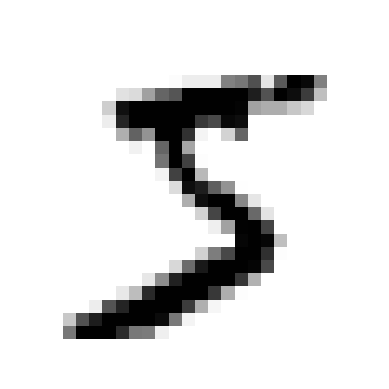

In [ ]:
def showimage(df, index):
  digit_image = df.to_numpy()[index].reshape(28,28)
  plt.imshow(digit_image, cmap="binary")
  plt.axis("off")
  plt.show()

showimage(mnist.data, 0)



In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target,test_size = 1/7, random_state=0)

test_img_copy = test_img.copy()

scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform (train_img)
test_img = scaler.transform (test_img)


pca = PCA(.95) # %95 varyans ile verileri sıkıştır
pca.fit(train_img)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)


#print(pca.n_components_)

logistic_reg = LogisticRegression(solver = 'lbfgs' , max_iter = 10000)
logistic_reg.fit (train_img,train_lbl)

print ("Accuracy: " , logistic_reg.score(test_img,test_lbl))



Accuracy:  0.9184


Real number: 


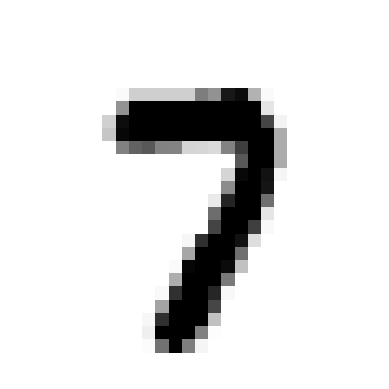

Predicted number:  ['6']


In [ ]:
print("Real number: ")
showimage(test_img_copy, 156)
print ( "Predicted number: " , logistic_reg.predict(test_img[115].reshape(1,-1)))

Epoch 1/10
469/469 [==============================] - 61s 124ms/step - loss: 0.3024 - accuracy: 0.9084 - val_loss: 0.0576 - val_accuracy: 0.9819
Epoch 2/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0998 - accuracy: 0.9704 - val_loss: 0.0421 - val_accuracy: 0.9858
Epoch 3/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0736 - accuracy: 0.9778 - val_loss: 0.0361 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0590 - accuracy: 0.9818 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 5/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0267 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0430 - accuracy: 0.9873 - val_loss: 0.0273 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0230 - val_acc